<a href="https://colab.research.google.com/github/Codedestructor56/DataScienceAndML/blob/main/AgePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
f_path="drive/MyDrive/fall23-age-prediction-from-images.zip"

In [4]:
os.path.exists(f_path)

True

In [5]:
!unzip drive/MyDrive/fall23-age-prediction-from-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: wiki_labeled/wiki_labeled/91/38073191_1980-10-17_2012.png  
  inflating: wiki_labeled/wiki_labeled/91/3808291_1960-05-26_2008.png  
  inflating: wiki_labeled/wiki_labeled/91/38155391_1944-01-30_1966.png  
  inflating: wiki_labeled/wiki_labeled/91/3830291_1966-10-31_2014.png  
  inflating: wiki_labeled/wiki_labeled/91/38317691_1995-07-08_2012.png  
  inflating: wiki_labeled/wiki_labeled/91/38390091_1938-10-01_1960.png  
  inflating: wiki_labeled/wiki_labeled/91/38431891_1996-11-04_2013.png  
  inflating: wiki_labeled/wiki_labeled/91/38432191_1995-04-18_2014.png  
  inflating: wiki_labeled/wiki_labeled/91/38495591_1952-03-30_1968.png  
  inflating: wiki_labeled/wiki_labeled/91/38637791_1988-05-10_2010.png  
  inflating: wiki_labeled/wiki_labeled/91/386491_1968-12-03_2006.png  
  inflating: wiki_labeled/wiki_labeled/91/3871391_1979-01-08_2009.png  
  inflating: wiki_labeled/wiki_labeled/91/3931891_1975-11-27_2014.png  
  infl

In [6]:
df=pd.read_csv("wiki_labels.csv")
df.head()

,ID,dob,dob_str,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
0,2002,723671,['05-May-1981'],2009,['17/10000217_1981-05-05_2009.png'],1.0,['Sami Jauhojärvi'],[[111.29109473 111.29109473 252.66993082 252.6...,4.300962388,NaN,27.746119
1,2003,711677,['03-Jul-1948'],2008,['12/100012_1948-07-03_2008.png'],1.0,['Marc Okrand'],[[113.52 169.84 366.08 422.4 ]],4.329328832,NaN,59.582192
2,2004,705061,['23-May-1930'],1961,['65/10001965_1930-05-23_1961.png'],1.0,['Aleksandar Matanović'],[[ 1 1 634 440]],#NAME?,NaN,30.696804
3,2005,720044,['31-May-1971'],2012,['16/10002116_1971-05-31_2012.png'],0.0,['Diana Damrau'],[[171.61031405 75.5745124 266.76611571 170.7...,3.408442415,NaN,40.672146
4,2006,716189,['09-Nov-1960'],2012,['02/10002702_1960-11-09_2012.png'],0.0,['Krista Tippett'],[[274.7656324 57.77009008 376.88699455 159.8...,4.748056378,NaN,51.224201


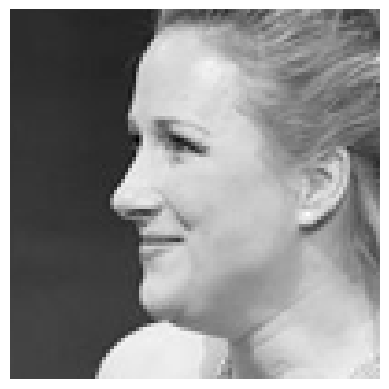

(100, 100, 3)

In [7]:
import cv2
root_path="/content/wiki_labeled/wiki_labeled"
def disp_im(image):
  image = cv2.imread(image)
  if image is not None:
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

      plt.imshow(image_rgb)
      plt.axis('off')
      plt.show()
  else:
      print("Failed to load the image. Please check the file path.")
  return image_rgb

disp_im(os.path.join(root_path,df.iloc[3].full_path[2:-2])).shape

In [8]:
def PCA_decomp(image, k):
    grayscale_image = np.mean(image, axis=2)
    mean = np.mean(grayscale_image)
    centered_image = grayscale_image - mean
    cov_matrix = np.cov(centered_image)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    top_k_eigenvectors = eigenvectors[:, :k]
    pca_transformed_data = np.dot(centered_image, top_k_eigenvectors)
    n, m = grayscale_image.shape
    pca_image = pca_transformed_data.reshape(n, k)

    return pca_image

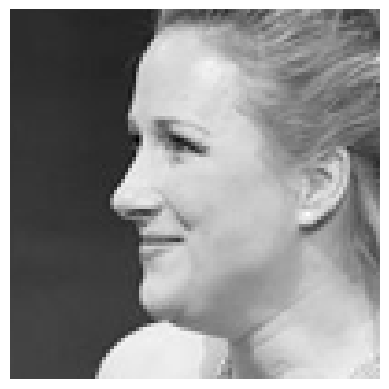

(100, 10)

In [12]:
#sample
PCA_decomp(disp_im(os.path.join(root_path,df.iloc[3].full_path[2:-2])),10).shape

In [13]:
pca_images = []
labels = []
count=0
for filename in os.listdir(root_path):
  root=os.path.join(root_path,filename)
  count+=1
  if count>2:
    break
  for file in os.listdir(root):
    if file.endswith(".png"):
      image_path = os.path.join(root, file)
      image = cv2.imread(image_path)
      pca_image = PCA_decomp(image, 1)
      matching_rows = df[df['full_path'].str.contains(file)]
      label = matching_rows.iloc[0]['age']
      pca_images.append(pca_image)
      labels.append(label)
      print(f"appending: {os.path.join(root,file)}")
X = np.stack(pca_images)
y = np.array(labels)

appending: /content/wiki_labeled/wiki_labeled/08/38341508_1988-06-23_2013.png
appending: /content/wiki_labeled/wiki_labeled/08/21957008_1979-01-09_2012.png
appending: /content/wiki_labeled/wiki_labeled/08/17806808_1956-05-15_2004.png
appending: /content/wiki_labeled/wiki_labeled/08/31134308_1990-12-13_2012.png
appending: /content/wiki_labeled/wiki_labeled/08/162108_1966-12-20_2008.png
appending: /content/wiki_labeled/wiki_labeled/08/3204508_1946-02-06_2008.png
appending: /content/wiki_labeled/wiki_labeled/08/7316408_1910-12-07_1993.png
appending: /content/wiki_labeled/wiki_labeled/08/1850808_1980-09-06_2013.png
appending: /content/wiki_labeled/wiki_labeled/08/2952708_1966-05-31_2006.png
appending: /content/wiki_labeled/wiki_labeled/08/40433608_1992-08-23_2015.png
appending: /content/wiki_labeled/wiki_labeled/08/1230308_1978-06-24_2009.png
appending: /content/wiki_labeled/wiki_labeled/08/1406808_1972-10-23_2008.png
appending: /content/wiki_labeled/wiki_labeled/08/46683608_1939-02-01_196

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_samples, params, param1=X_train.shape
X_train=X_train.reshape(num_samples,-1)
num_samples, params, param1=X_test.shape
X_test=X_test.reshape(num_samples,-1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")

[36.68977504 36.01784383 40.23616583 35.24045321 34.08743557 26.07516729
 35.37355764 45.77605506 44.1303303  45.93663305 37.43502206 26.5870503
 38.2333445  35.66517419 41.86462276 37.16274852 36.68977504 40.51834788
 30.65784951 36.68977504 33.58672941 25.28674343 31.96567309 27.38685434
 33.36358519 20.18962223 35.90879729 35.80735755 26.0289674  40.66711836
  1.99906016 36.64910002 13.87516966 34.80581004 42.96329238 36.68977504
 37.00937735 36.68977504 42.08019077 28.9730662  36.68977504 26.64187289
 30.58403587 29.83409443 38.71968463 35.53622375 36.68977504 36.68977504
 31.56011464 35.11734923 26.31311659 36.68977504 30.66233778 30.57261878
 36.68977504 36.68977504 36.68977504 36.33363901 37.08961296 43.11137335
 34.75242655 35.20978638 30.8274023  31.47724538 31.13737234 40.36049397
 45.43458477 27.75002708 41.89981135 35.17147853 42.96350635 36.68977504
 34.62956767 30.78749292 28.50255018 36.68977504 32.53192568 46.22647435
 36.66231091 41.75962419 40.95805033 37.1200191  36.

In [15]:
def predict_age(model, image_path):
    image = cv2.imread(image_path)
    if image is not None:
        image=PCA_decomp(image,1)
        image=image.reshape(1,-1)
        age_prediction = model.predict(image)
        return age_prediction
    else:
        return None

In [16]:
test_root="wiki_judge_images/wiki_judge_images"
dir=os.listdir(test_root)
predict_age(model,os.path.join(test_root,dir[np.random.choice(len(dir)-1)]))[0]

24.438962793528226

In [17]:
image_directory="wiki_judge_images/wiki_judge_images"
predictions = []

for filename in os.listdir(image_directory):
    if filename.endswith(".png"):
        image_path = os.path.join(image_directory, filename)
        age_prediction = predict_age(model, image_path)
        if age_prediction is not None:
            predictions.append(age_prediction[0])
        else:
            predictions.append(np.nan)

df_submit = pd.DataFrame({'Filename': os.listdir(image_directory), 'PredictedAge': predictions})

df_submit.to_csv('submission.csv', index=False)